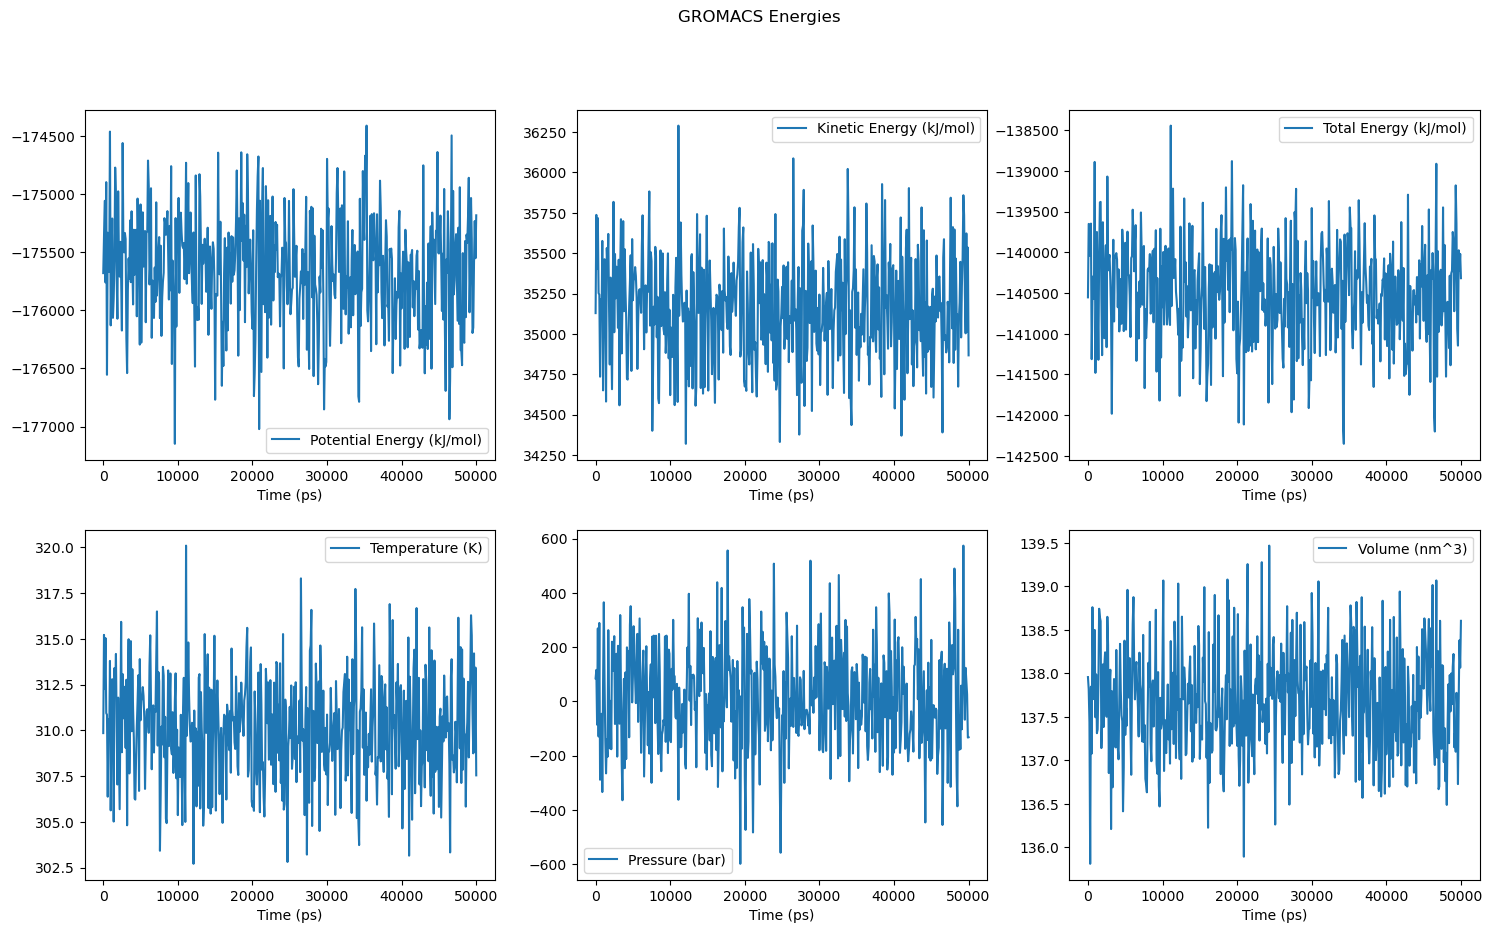

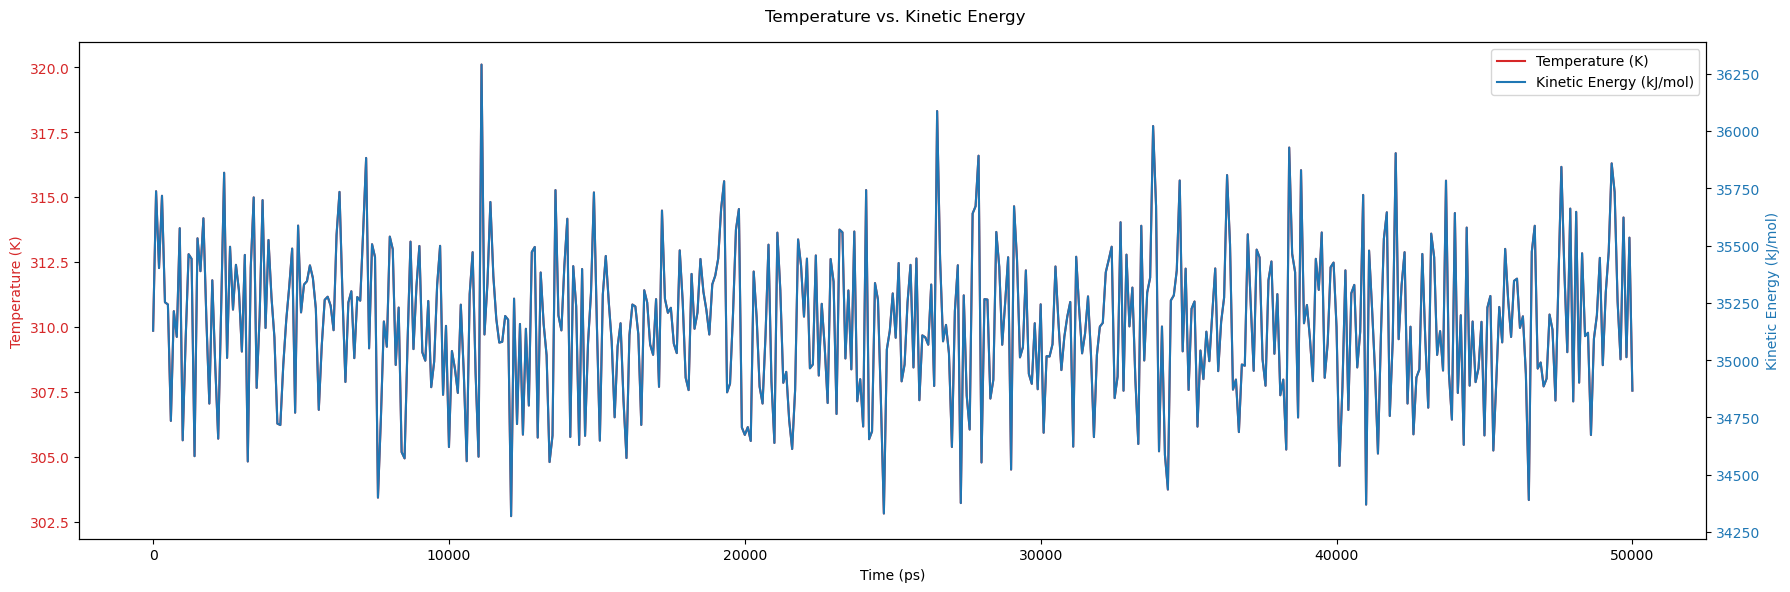

In [1]:
import numpy as np
import matplotlib.pyplot as plt

file_path = "/scratch/work/courses/CHEM-GA-2671-2023fa/students/sw4384/comp-lab-class-2023/Week2/Data/1hz3_T310.run.25000000.energy.xvg"
start_line = 30

# Make lists
x_data = []
y_data = [[] for _ in range(6)]
y_labels = ["Potential Energy (kJ/mol)", "Kinetic Energy (kJ/mol)", "Total Energy (kJ/mol)", "Temperature (K)", "Pressure (bar)", "Volume (nm^3)"]

# Read data from the file starting from line 30
with open(file_path, 'r') as file:
    for i, line in enumerate(file, start=1):
        if i < start_line:
            continue  # Skip lines before line 30
        values = line.strip().split()  # Split line into values
        x_data.append(float(values[0]))  # Assuming the first column contains x-values
        for j in range(1, 7):  # Assuming columns 2 to 7 are y-values
            y_data[j - 1].append(float(values[j]))

# Create a single plot for all data
fig, axs = plt.subplots(2, 3, figsize=(18, 10))  # Wider plots with figsize=(18, 10)

for i, ax in enumerate(axs.flat):
    ax.plot(x_data, y_data[i], label=y_labels[i])
    ax.set_xlabel("Time (ps)")
    ax.legend(loc="best")  # Display the legend in the best location

# Set a single title for all graphs
fig.suptitle("GROMACS Energies")

# Create plot with dual y-axes for T and KE
fig2, ax2 = plt.subplots(figsize=(18, 6))  # Wider plot with figsize=(18, 6)

# Temperature data (left y-axis)
ax2.set_xlabel("Time (ps)")
ax2.set_ylabel("Temperature (K)", color="tab:red")
ax2.plot(x_data, y_data[3], color="tab:red", label="Temperature (K)")
ax2.tick_params(axis="y", labelcolor="tab:red")

# Kinetic Energy data (right y-axis)
ax2_right = ax2.twinx()
ax2_right.set_ylabel("Kinetic Energy (kJ/mol)", color="tab:blue")
ax2_right.plot(x_data, y_data[1], color="tab:blue", label="Kinetic Energy (kJ/mol)")
ax2_right.tick_params(axis="y", labelcolor="tab:blue")

# Add legends for both y-axes
lines = ax2.get_lines() + ax2_right.get_lines()
ax2.legend(lines, [line.get_label() for line in lines], loc="best")

# Set a title for the combined plot
fig2.suptitle("Temperature vs. Kinetic Energy")

plt.tight_layout()
plt.show()


In [6]:
import mdtraj as md

# Load the PDB file with the correct file path
pdb_file_path = '/scratch/work/courses/CHEM-GA-2671-2023fa/students/sw4384/comp-lab-class-2023/Week2/Data/1UBQ_processed.pdb'
traj = md.load(pdb_file_path)
import mdtraj as md
import numpy as np

# Define donor and acceptor atom selections
donor_selection = 'protein and name N'  # Modify as needed
acceptor_selection = 'protein and name O'  # Modify as needed

# Get indices of donor and acceptor atoms
donor_indices = traj.topology.select(donor_selection)
acceptor_indices = traj.topology.select(acceptor_selection)

# Create atom_pairs array with shape (n_pairs, 2)
atom_pairs = np.column_stack((donor_indices, acceptor_indices))

# Calculate distances between donor and acceptor atoms
distances = md.compute_distances(traj, atom_pairs)

# Set a hydrogen bond distance threshold
hydrogen_bond_distance = 3.0  # You can adjust this distance threshold

# Find hydrogen bonds based on the distance threshold
hbonds = []
for frame_distances in distances:
    frame_hbonds = []
    for i, distance in enumerate(frame_distances):
        if distance < hydrogen_bond_distance:
            donor_atom = traj.topology.atom(atom_pairs[i, 0])
            acceptor_atom = traj.topology.atom(atom_pairs[i, 1])
            frame_hbonds.append((donor_atom, acceptor_atom))
    hbonds.append(frame_hbonds)

num_hbonds = 0    
    
# Print hydrogen bond information
for frame, hbond_frame in enumerate(hbonds):
    for donor_atom, acceptor_atom in hbond_frame:
        #print(f"Frame {frame}: Hydrogen bond between {donor_atom} and {acceptor_atom}")
        num_hbonds+=1

print('Number of Hydrogen Bonds:', num_hbonds)

# Calculate DSSP assignments
dssp = md.compute_dssp(traj)

# Define a counter for alpha helix residues
alpha_helix_count = 0

# Loop through frames and DSSP assignments
for frame, dssp_frame in enumerate(dssp):
    for residue, dssp_code in enumerate(dssp_frame):
        # Check if the DSSP code indicates an alpha helix ('H') conformation
        if dssp_code == 'H':
            alpha_helix_count += 1

print(f"Number of helical amino acids: {alpha_helix_count}")



Number of Hydrogen Bonds: 76
Number of helical amino acids: 18


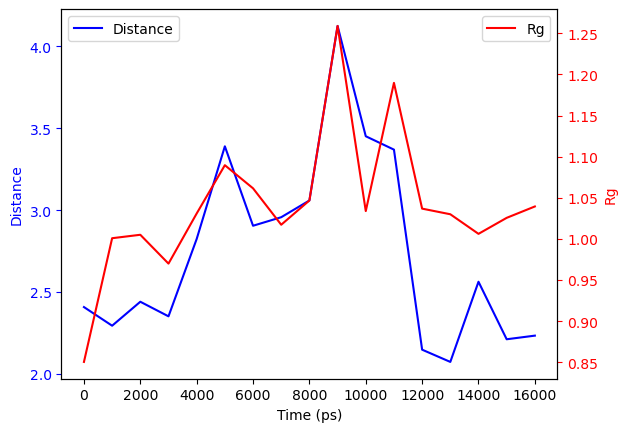

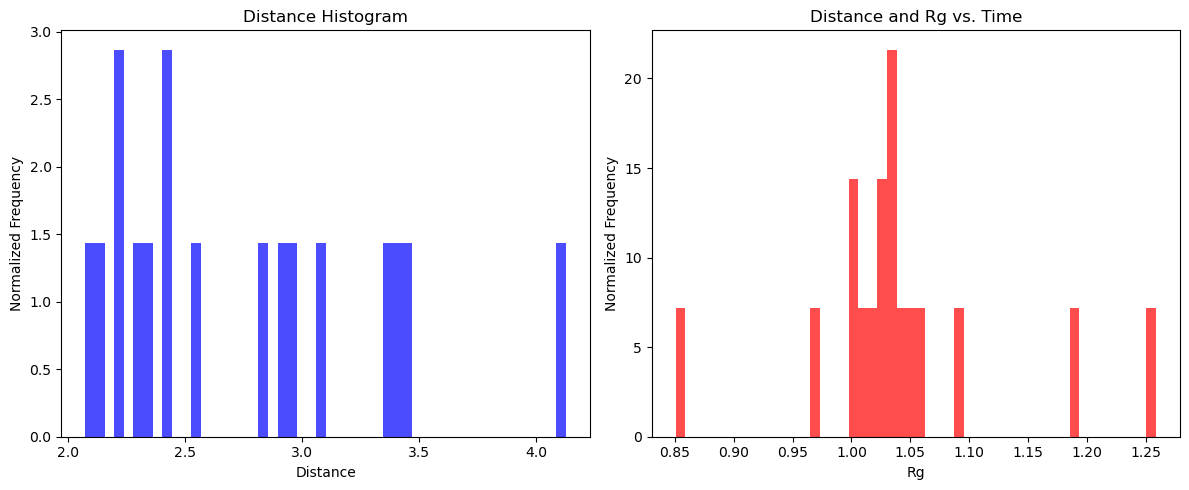

In [3]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# Load the trajectory
trajectory_file = '/scratch/work/courses/CHEM-GA-2671-2023fa/students/sw4384/comp-lab-class-2023/Week2/Data/1hz3_T310.stepid25000000.every100ps.nowater.xtc'
topology_file = '/scratch/work/courses/CHEM-GA-2671-2023fa/students/sw4384/comp-lab-class-2023/Week2/Data/1hz3_T310.start.nowater.gro'

traj = md.load(trajectory_file, top=topology_file)

# Compute the distance between the first and last atom
def end_end(traj):
    first = traj.xyz[:, 0, :]
    last = traj.xyz[:, -1, :]
    dist = np.sqrt(np.sum((first - last) ** 2, axis=1))
    return dist

# Compute the distance between the first and last atom
dist = end_end(traj)

# Calculate the radius of gyration
Rg = md.compute_rg(traj)

# Plot distance vs. time and Rg vs. time on the same plot
fig, ax1 = plt.subplots()

# Plot distance on the left y-axis
ax1.plot(traj.time, dist, label='Distance', color='b')
ax1.set_xlabel('Time (ps)')
ax1.set_ylabel('Distance', color='b')
ax1.tick_params('y', colors='b')

# Create a second y-axis on the right for Rg
ax2 = ax1.twinx()
ax2.plot(traj.time, Rg, label='Rg', color='r')
ax2.set_ylabel('Rg', color='r')
ax2.tick_params('y', colors='r')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Create separate plots for distance and Rg histograms
plt.figure(figsize=(12, 5))

# Plot histogram for distance
plt.subplot(1, 2, 1)
plt.hist(dist, bins=50, density=True, color='b', alpha=0.7)
plt.xlabel('Distance')
plt.ylabel('Normalized Frequency')
plt.title('Distance Histogram')

# Plot histogram for Rg
plt.subplot(1, 2, 2)
plt.hist(Rg, bins=50, density=True, color='r', alpha=0.7)
plt.xlabel('Rg')
plt.ylabel('Normalized Frequency')
plt.title('Rg Histogram')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.title('Distance and Rg vs. Time')
plt.show()
